# Beat Tracking with Madmom
---

-- Deep learning approach: RNN --

Reference: 
https://www.analyticsvidhya.com/blog/2018/02/audio-beat-tracking-for-music-information-retrieval/
http://recherche.ircam.fr/pub/dafx11/Papers/31_e.pdf

## Theory:

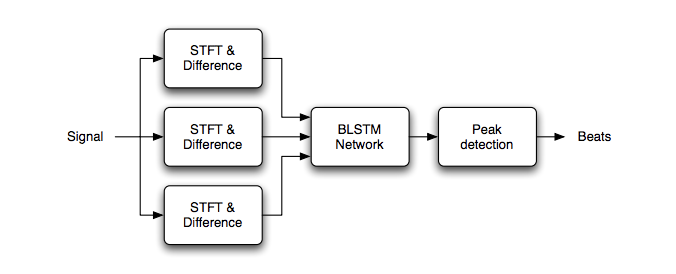

## Programming Steps:

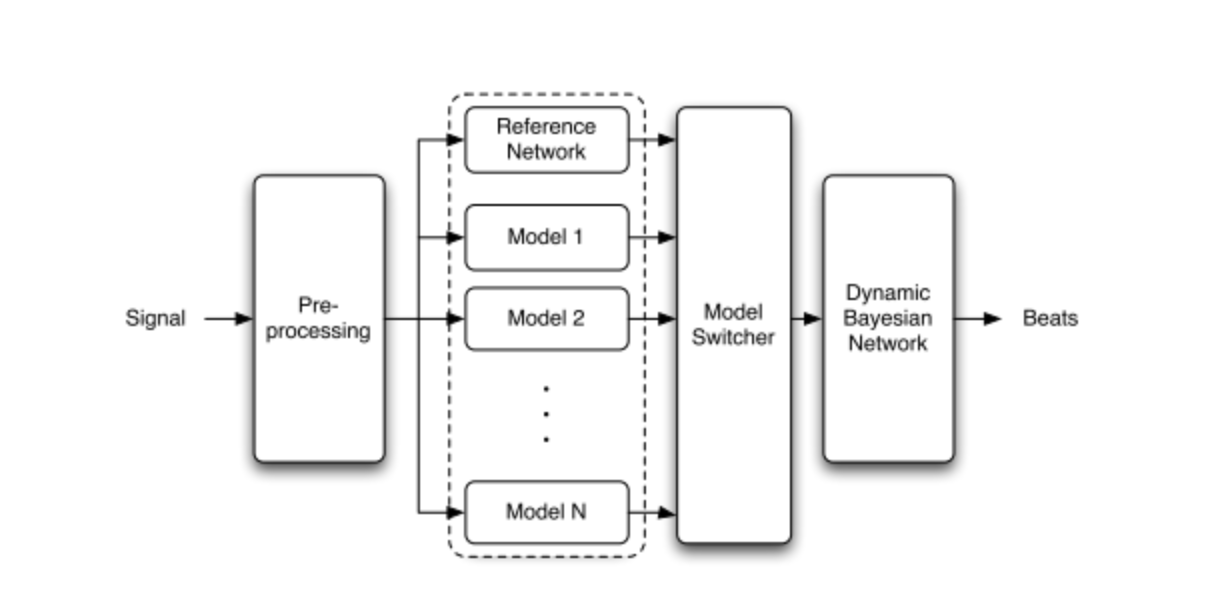

#### ---> Step 1: Preprocessing audio signal

#### ---> Step 2: Training and Fine Tuning the RNN models

#### ---> Step 3: Choosing the best RNN model

#### ---> Step 4: Applying Dynamic Bayesian Network
---

### Import Module

In [1]:
import librosa
import madmom
import pyaudio
import numpy as np

### Step 1: Audio File Input

In [2]:
try:
    x, fs = librosa.load('demo.mp3') 
except:
    raise IOError("!!!!!!!!!!!!!!!!!!!!!!!!!")

### Step 2: Beat Tracking

In [3]:
proc = madmom.features.beats.DBNBeatTrackingProcessor(fps = 100)
print(proc)

In [4]:
act = madmom.features.beats.RNNBeatProcessor()(x)
print(act)

[0.00197655 0.00173416 0.002443   ... 0.003243   0.00663108 0.01413147]


In [5]:
beat_times = proc(act)

In [6]:
clicks = librosa.clicks(beat_times, sr = fs, length=len(x))

In [7]:
data = x + clicks

### Step 3: Audio File Output

In [8]:
p = pyaudio.PyAudio()
stream = p.open(format = pyaudio.paFloat32, channels = 1, rate = fs, output = True)
stream.write(data.astype(np.float32).tostring())

## It's Your Turn !

### Mission: 
#### (1) Generate a suitable tempo for "Chopin Nocturne Op. 62 No. 2 in E.mp3" then Add clicks for output beat times and write it to an audio file. 
#### (2) Discuss what is the code doing and the corresponding principle at Step 2: Beat tracking